# Introduction to `numpy`, `sympy` and `matplotlib`

Kevin J. Walchko
created 5 July 2017

---

Matplotlib, NumPy and pysym are open-source add-on modules to Python that provide common mathematical and numerical routines in pre-compiled, fast functions. These are growing into highly mature packages that provide functionality that meets, or perhaps exceeds, that associated with common commercial software like MatLab. There is little that Matlab can do that python, numpy and other modules can't do too.

Matplotlib is a plotting library modeled after Matlab's plotting commands. We will use `matplotlib` to produce some graphs, but really use it heavily when we get to image processing. Again, we will delay the image specific functions until we get to that point. Here we are just going to learn the basics.

## Objectives

- Understand how to do very basic linear algebra in python
- Understand how to do symbolic manipulation in python
- Understand how to use matplotlib
   - How to insert LaTeX math symbols into plots
- Understand how to plot engineering data in a Jupyter notebook

## References

- [numpy tutorial](https://docs.scipy.org/doc/numpy-dev/user/quickstart.html)
- [numpy for matlab users](https://docs.scipy.org/doc/numpy-dev/user/numpy-for-matlab-users.html)
- [sympy](http://www.sympy.org/en/index.html)
- [sympy tutorials](http://docs.sympy.org/latest/tutorial/index.html)
- [matplotlib examples](https://matplotlib.org/users/pyplot_tutorial.html)
- [matplotlib summary](https://matplotlib.org/api/pyplot_summary.html)
- [matplotlib gallery of plots](https://matplotlib.org/gallery.html)
- [LaTEX math symbols](http://web.ift.uib.no/Teori/KURS/WRK/TeX/symALL.html)

## Setup

In [5]:
%matplotlib inline
from __future__ import division
from __future__ import print_function
import numpy as np  # common to rename numpy to np ... because programmers are lazy :)
from matplotlib import pyplot as plt

# Numpy

First let's do some simple matrix/vector operations, since we will need this for our serial manipulator work. We will also use `numpy` later for OpenCV imagery work, but we will push that off to later when we need it. There are some specific things we need  to understand when working with images that would be best covered right before we need it.

In [6]:
# lets create an array
a = np.array([1,2,3])  # you could call this a 3 dimensional vector if you want
print(a)

[1 2 3]


In [7]:
# let's create a matrix with rows: [1,2,3], [4,5,6], and [6,7,8]
m = np.array([
    [1,2,3],
    [4,5,6],
    [6,7,8]
])
print('m =', m)
print('size', m.size)
print('shape', m.shape)
print('type', m.dtype)

m = [[1 2 3]
 [4 5 6]
 [6 7 8]]
size 9
shape (3L, 3L)
type int32


Now, generally we don't think about data types with python, but for math (and later working with images in OpenCV) we will. *Note:* you will probably have to prefix these with a namespace like `np`: `np.uint8`. This assumes you did the `import numpy as np`. 

| Data type	| Description |
|---|:---|
| bool_	| Boolean (True or False) stored as a byte
| int_	| Default integer type (same as C long; normally either int64 or int32)
| intc	| Identical to C int (normally int32 or int64)
| intp	| Integer used for indexing (same as C ssize_t; normally either int32 or int64)
| int8	| Byte (-128 to 127)
| int16	| Integer (-32768 to 32767)
| int32	| Integer (-2147483648 to 2147483647)
| int64	| Integer (-9223372036854775808 to 9223372036854775807)
| uint8	| Unsigned integer (0 to 255)
| uint16 | Unsigned integer (0 to 65535)
| uint32 | Unsigned integer (0 to 4294967295)
| uint64 | Unsigned integer (0 to 18446744073709551615)
| float_ | Shorthand for float64.
| float16 | Half precision float: sign bit, 5 bits exponent, 10 bits mantissa
| float32 | Single precision float: sign bit, 8 bits exponent, 23 bits mantissa
| float64 | Double precision float: sign bit, 11 bits exponent, 52 bits mantissa
| complex_ | Shorthand for complex128.
| complex64	| Complex number, represented by two 32-bit floats (real and imaginary components)
| complex128 | Complex number, represented by two 64-bit floats (real and imaginary components)

Honestely, I generally only use `np.float` for math or `np.unit8` for OpenCV. However, if you are calculating 3-phase power from ENGR 311, you *might* need `np.complex`, but I am not an AC power guy.

In [8]:
# there are functions for special matrices
# zeros matrix
z = np.zeros((3,3))
print(z)

# Identity matrix
o = np.eye(3)
print(o)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [9]:
# numpy even works in multiple dimension beyond standard MxN matrices
np.zeros((3,4,5)) # go on and add some more dimentions like: (3,3,3,3)

array([[[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]])

In [10]:
# let's multiply them together
# NOTE: you can NOT do v * a
v = m.dot(a)
print(v)

[14 32 44]


In [18]:
print(v, '\n')
print(m, '\n')
# let's access the number of each ... all zero based arrays
print('first v:', v[0])   # this is a vector (or array) so only 1 number given to get the value
print('first m:', m[0,0]) # this is a matrix, so you need 2 numbers to get the value 

# now let's do the last number
print('last v:', v[2])
print('last m:', m[2,2])

# remember: m[row, column]
print('\nm[0,1]', m[0,1])
print('m[2]', m[2], ' this gives me the entire row')

# let's get their dimensions
print('\nlen(a):', len(v))
print('v.shape:', v.shape)
print('m.shape:', m.shape)

[14 32 44] 

[[1 2 3]
 [4 5 6]
 [6 7 8]] 

first v: 14
first m: 1
last v: 44
last m: 8

m[0,1] 2
m[2] [6 7 8]  this gives me the entire row

len(a): 3
v.shape: (3L,)
m.shape: (3L, 3L)


**Remeber for later:** OpenCV uses numpy to represent images. We access things by Matrix[row, col]. During image processing we have the same matrix interface, but we access a pixel by Image[height, width]. Here, height and row are the same while column and width are the same. This is backwards from how we usually think about images or screen resolutions, width x height like: 640 x 480.

In [19]:
n = np.array([
    [1,0,0],
    [0,2,0],
    [0,0,3]
])

# inverse
nn = np.linalg.inv(n)
print('nn:\n', nn)

# calculate the determinate
nn = np.linalg.det(n)
print('det(n) =',nn)

# calculate the norm
nn = np.linalg.norm(n)
print('norm(n) =', nn)

nn:
 [[1.         0.         0.        ]
 [0.         0.5        0.        ]
 [0.         0.         0.33333333]]
det(n) = 6.0
norm(n) = 3.7416573867739413


In [11]:
# too much typing ... let's shorten it
# just becareful not to alias another python function ... python for example
# already has a built in abs (absolute) function, but so numpy
from numpy.linalg import inv, det, norm

# inverse
nn = inv(n)
print('nn', nn)

# calculate the determinate
nn = det(n)
print('det(n)', nn)

# calculate the norm
nn = norm(n)
print('norm(n)', nn)

nn [[ 1.          0.          0.        ]
 [ 0.          0.5         0.        ]
 [ 0.          0.          0.33333333]]
det(n) 6.0
norm(n) 3.74165738677


In [15]:
# let's iterate over a matrix and print each value out
# remember, m.shape returns (rows, cols) tuple
m = np.array([
    [1,2,3],
    [4,5,6],
    [6,7,8]
])
mm, nn = m.shape
for i in range(mm):
    for j in range(nn):
        print('m[{}, {}] = {}'.format(i,j,m[i,j]))

print('') # add a blank line between the 2 prints
print(m)

m[0, 0] = 1
m[0, 1] = 2
m[0, 2] = 3
m[1, 0] = 4
m[1, 1] = 5
m[1, 2] = 6
m[2, 0] = 6
m[2, 1] = 7
m[2, 2] = 8

[[1 2 3]
 [4 5 6]
 [6 7 8]]


In [16]:
# we can do it another way
# also, enumerate is a nice way to get a counter
for i, r in enumerate(m):
    for j, c in enumerate(r):
        print('m[{}, {}] = {}'.format(i,j,c))

m[0, 0] = 1
m[0, 1] = 2
m[0, 2] = 3
m[1, 0] = 4
m[1, 1] = 5
m[1, 2] = 6
m[2, 0] = 6
m[2, 1] = 7
m[2, 2] = 8


## Documentation

If you don't understand what a function does, Google it or (like all python libraries) use the built in help system: `help(numpy.inv)`. 

You can also find out what is availble in a  package by: `dir(numpy)`. This would list everything in `numpy`. Or if you wanted to know what was in the linear algebra sub-package: `dir(numpy.linalg)`.

# Sympy

You can use sympy to manipulate equations symbolically. This will be useful later when we do forward/inverse kinematics.

1. get library and functions you need: from sympy import symbols, simplify
   1. you may also need other things like trig functions: from sympy import sin, cos, pi
1. define your symbols()
1. build your equations
1. then run simplify()
1. finally substitute in values for variables if needed

In [20]:
from sympy import symbols, sin, cos, pi, simplify

In [21]:
# create some symbols and a symbolic equation
a, b = symbols('a b')
eqn = sin(a)*sin(a)+cos(a)**2+sin(b)/cos(b) + a
print(eqn)

a + sin(a)**2 + sin(b)/cos(b) + cos(a)**2


In [22]:
# simplify the equations
# s^2 + c^2 = 1
# s/c = tan
e = simplify(eqn)
print(e)

a + tan(b) + 1


In [24]:
# e is a numpy object, uncomment and see all of the amazing function (methods in CompSci lingo) that are associated with it
# dir(e)

In [20]:
# substitute in some numbers for a and b
ee=e.subs([(b, 2.0), (a, 3.0)])
print(ee)

1.81496013673848


In [25]:
# this should give us the same answer
import math
3.0+math.tan(2.0)+1.0

1.8149601367384811

# Matplotlib

This will allow us to plot sensor data, robot arm positions, a path through a map, images, etc. We will cover a few commands here, but revisit this later when we are doing image processing. The key commands are:

- plt.plot()
- plt.subplot()
- plt.legend()
- plt.title()
- plt.ylabel() and plt.xlabel()
- plt.grit()
- plt.text()

There really isn't anything hard here, just examples of the plotting commands we will use the most. See the [Matplotlib gallery](https://matplotlib.org/gallery.html) for more examples of what is possible.

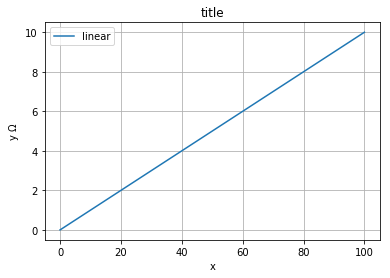

In [26]:
# Prepare the data
x = np.linspace(0, 100, 10)  # linspace(start, stop, number_of_points)
y = np.linspace(0, 10, 10)

# Plot the data
plt.plot(x, y, label='linear')

# make it look nice
plt.grid(True)
plt.legend()
plt.title('title')
plt.ylabel('y $\Omega$')  # you can also include latex math symbols
plt.xlabel('x');  # note, if you don't put the ';' at the end, it prints 
                  # the object address. Not an issue, but it annoys me

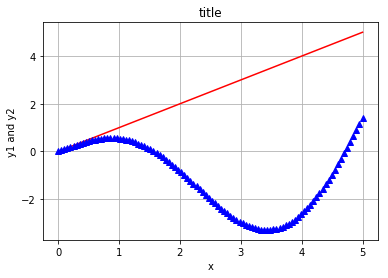

In [28]:
from math import cos

# Prepare the data
x = np.linspace(0, 5, 100)  # linspace(start, stop, how_many_inbetween)
y1 = x                      # simple stupid y = x linear line
y2 = [n*cos(n) for n in y1] # remember this fancy way to use a for loop and create an array?

# similar to matlab
plt.plot(x,y1, 'r-', x,y2, 'b^')  # if you only put 1 array, plot assumes it is the y-axis

# make it look nice
plt.grid(True)
plt.title('title')
plt.ylabel('y1 and y2')
plt.xlabel('x');

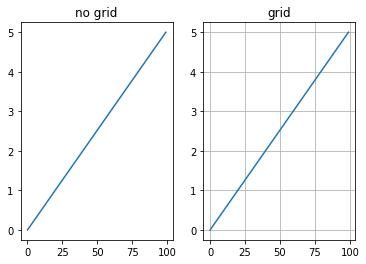

In [30]:
# let's put more than one plot together ... every use subplot in Matlab?
plt.subplot(1,2,1)
plt.plot(x, label='linear')
plt.title('no grid')

plt.subplot(1,2,2)
plt.plot(x, label='linear')
plt.title('grid');
plt.grid(True)

# Quiz Next Class

You can do the entire thing ahead of time if you want ... take a look at the next lesson. I suggest you come into class with the answers done. **Do not work with anyone else, come to me if you have questions!** I want this to be a learning oppertunity! You are now considered to know python, jupyter, matplotlib, and sympy.

# Exercises

- Run back through this notebook and play with things so you understand it. This will lay the foundation for the Quiz and Lab 2.

# Questions

1. How do you create a 2x3 matrix?
1. How do you create a 3x3 zero or ones (identity) matrix?
1. How do you add, multiply or divide 2 matrices together? How about a matrix and a vector?
1. How do you plot y = 3x-5 between [-5,5]? Make sure you turn on the grid, label the axes and give it title.


-----------

<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.